# Ben's Cleaning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Assigning the movie gross table to variable
df_movie_gross = pd.read_csv('dataframe_id_bom_movie_gross_gz.csv')

In [3]:
df_movie_gross.head() #checking the layout and stats


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# dropping 'studio' column due to irrelevance
df_movie_gross.drop(axis=1, columns='studio', inplace=True)

In [5]:
#finding NaNs
print(df_movie_gross.isna())
print(df_movie_gross.isna().sum())

      title  domestic_gross  foreign_gross   year
0     False           False          False  False
1     False           False          False  False
2     False           False          False  False
3     False           False          False  False
4     False           False          False  False
...     ...             ...            ...    ...
3382  False           False           True  False
3383  False           False           True  False
3384  False           False           True  False
3385  False           False           True  False
3386  False           False           True  False

[3387 rows x 4 columns]
title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [6]:
# missing 5 values for sutdio [dropping column anyway] 
#domestic_gross is missing 28 values might just drop those rows
#foreign_gross missing 1350 values; calculating the percentage of data missing
(df_movie_gross['foreign_gross'].isna()
                 .sum()/len(df_movie_gross['foreign_gross'])) * 100

39.85828166519043

In [7]:
# 39.85% of our foreign gross values is missing, replacing with median values
# checking for why NaN's present (did these movies not get foreign/domestic releases?)
df = df_movie_gross
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

                                       title  domestic_gross foreign_gross  \
222                                  Flipped       1800000.0           NaN   
230               It's a Wonderful Afterlife             NaN       1300000   
254   The Polar Express (IMAX re-issue 2010)        673000.0           NaN   
267                           Tiny Furniture        392000.0           NaN   
269            Grease (Sing-a-Long re-issue)        366000.0           NaN   
...                                      ...             ...           ...   
3382                               The Quake          6200.0           NaN   
3383             Edward II (2018 re-release)          4800.0           NaN   
3384                                El Pacto          2500.0           NaN   
3385                                The Swan          2400.0           NaN   
3386                       An Actor Prepares          1700.0           NaN   

      year  
222   2010  
230   2010  
254   2010  
267   2010 

In [8]:
# Assuming that NaN's represent lack of releases in those markets, replacing NaN's with 0's
df_movie_gross['domestic_gross'].fillna(0, inplace=True)
df_movie_gross['foreign_gross'].fillna(0, inplace=True)
# Checking results
print(df_movie_gross.isna().sum())

title             0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [9]:
# Changing foreign_gross to int
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").str.replace("'","").astype('float')
    return df[col]

df_movie_gross['foreign_gross'] = convert_amt_to_int(df_movie_gross, 'foreign_gross')


In [10]:
df_movie_gross['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [11]:
# making list of all columns to change the data types


In [12]:
# importing budget csv to see if I can fill in missing data by merging

df_budget = pd.read_csv('dataframe_id_tn_movie_budgets_gz.csv')
#checking head, info, and shape


In [13]:
# dropping irrelevant columns
df_budget.drop(axis=1, columns=['id'], inplace=True)
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 226.0+ KB


In [14]:
#checking for missing values
df_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
# no missing values, all relevant columns need to be converted into integers

# Ayesha's Data Cleaning for title_akas


In [16]:
df_title_akas = pd.read_csv('dataframe_id_imdb_title_akas_gz.csv')
df = df_title_akas

In [17]:
df.head()


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [18]:
# Grouping data in catagories (title id joins with df_names )
df.groupby('title')
df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [19]:
# Data not relevant 
df.groupby('title')

In [20]:
df.groupby('language').mean()

,ordering,is_original_title
language,,
af,2.400000,0.0
ar,5.500000,0.0
az,19.000000,0.0
bg,9.748961,0.0
bn,2.393443,0.0
...,...,...
xh,2.000000,0.0
yi,3.500000,0.0
yue,6.489510,0.0


In [21]:
# dropping attribute column
df = df.drop('attributes', axis = 1)
df.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
is_original_title        25
dtype: int64

# Ayesha's Data Cleaning for movies

In [22]:
df_movies = pd.read_csv('dataframe_id_tmdb_movies_gz.csv')

In [23]:
df_movies.head()
#print(df_movies.info())
#print(df_movies.shape)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [24]:
# not letting me groupby: genre_ids, original_title, popularity, release_date, 
# (genre id's used with df_title basics['genres'])
df.groupby('title').median() 

,ordering,is_original_title
title,,
!Women Art Revolution,2.5,0.0
# Pire soirée,22.0,0.0
#1 Serial Killer,2.5,0.5
#211,3.0,0.0
#5,1.5,0.0
...,...,...
междугородный,3.0,0.0
неЧЕСТНА ИГРА,21.0,0.0
ороолон,3.0,0.0



# Ayesha's Data Cleaning title_basics

In [25]:
df_title_basics = pd.read_csv('dataframe_id_imdb_title_basics_gz.csv')

In [26]:
print(df_title_basics.head())
print(df_title_basics.info())
print(df_title_basics.shape)

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_titl

In [27]:
# tconts correlates with title_basics, title_crew, title_principals

df = df_title_basics


In [28]:
df.groupby('genres')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
#genres



# Alex's Cleaning

In [30]:
import pandas as pd

In [31]:
pd.read_csv('dataframe_id_bom_movie_gross_gz.csv')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [32]:
#importing dataframe (AT dataset 1)
title_basics = pd.read_csv("dataframe_id_imdb_title_basics_gz.csv")
title_basics.head()
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [33]:
#checking for missing values
title_basics.isna().sum()


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [34]:
#replacing missing runtime_minutes values with mean of existing runtime minutes
title_basics["runtime_minutes"] = title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean())

In [35]:
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [36]:

#checking to see if any start year is suspicious
title_basics['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [37]:
title_basics["original_title"].unique()

array(['Sunghursh', 'Ashad Ka Ek Din', 'The Other Side of the Wind', ...,
       'Dankyavar Danka', '6 Gunn', 'Chico Albuquerque - Revelações'],
      dtype=object)

In [38]:
title_basics["primary_title"].unique()

array(['Sunghursh', 'One Day Before the Rainy Season',
       'The Other Side of the Wind', ..., 'Dankyavar Danka', '6 Gunn',
       'Chico Albuquerque - Revelações'], dtype=object)

In [39]:
title_basics["tconst"].unique()

array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916706',
       'tt9916730', 'tt9916754'], dtype=object)

In [40]:
#checking for duplicates
duplicates = title_basics[title_basics.duplicated(subset='tconst')]
print(len(duplicates))
duplicates.tail()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [41]:
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [42]:
#replacing missing values for genres with string "missing"
title_basics['genres'] = title_basics['genres'].fillna(value="missing")

In [43]:
title_basics.isna().sum()

tconst              0
primary_title       0
original_title     21
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [44]:

title_basics.start_year.value_counts(normalize=True)

2017    0.119772
2016    0.118185
2018    0.115290
2015    0.111144
2014    0.106669
2013    0.100647
2012    0.094338
2011    0.088269
2010    0.081078
2019    0.057334
2020    0.006411
2021    0.000568
2022    0.000219
2023    0.000034
2024    0.000014
2027    0.000007
2026    0.000007
2025    0.000007
2115    0.000007
Name: start_year, dtype: float64

In [45]:

#removing all rows associated with starting year greater than 2020
title_basics = title_basics[title_basics.start_year < 2020]
title_basics["start_year"].max()
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [46]:
# Splitting genres and keeping separated by commas to look cleaner (Ayesha)
title_basics['genres'] = title_basics['genres'].apply(lambda x: x.split(",") if x else x)
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"[Comedy, Drama, Fantasy]"


In [47]:
#importing dataframe (AT Dataset 2)
title_crew = pd.read_csv("dataframe_id_imdb_title_crew_gz.csv")
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [48]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [49]:
duplicates2 = title_crew[title_crew.duplicated(subset='tconst')]
print(len(duplicates2))
duplicates2.tail()

0


,tconst,directors,writers


In [50]:
title_crew['tconst'].unique()

array(['tt0285252', 'tt0438973', 'tt0462036', ..., 'tt9001494',
       'tt9004986', 'tt9010172'], dtype=object)

In [51]:
title_crew['directors'].unique()

array(['nm0899854', nan, 'nm1940585', ..., 'nm10122357', 'nm6711477',
       'nm10123242,nm10123248'], dtype=object)

In [52]:
title_crew['writers'].unique()

array(['nm0899854', 'nm0175726,nm1802864', 'nm1940585', ..., 'nm6711477',
       'nm4993825', 'nm8352242'], dtype=object)

In [53]:
title_crew.directors.value_counts(normalize=True)

nm3266654    0.000442
nm5592581    0.000342
nm2682776    0.000342
nm3583561    0.000328
nm0183659    0.000313
               ...   
nm1656565    0.000007
nm1353167    0.000007
nm0288055    0.000007
nm1427420    0.000007
nm7042030    0.000007
Name: directors, Length: 98525, dtype: float64

In [54]:
title_crew.writers.value_counts(normalize=True)

nm0000636              0.000726
nm2682776              0.000435
nm3266654              0.000417
nm3583561              0.000363
nm0772905              0.000308
                         ...   
nm1386911              0.000009
nm4628857              0.000009
nm2525275              0.000009
nm0451283,nm0849554    0.000009
nm4482729              0.000009
Name: writers, Length: 91920, dtype: float64

In [55]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [56]:
title_crew.describe

<bound method NDFrame.describe of            tconst                      directors              writers
0       tt0285252                      nm0899854            nm0899854
1       tt0438973                            NaN  nm0175726,nm1802864
2       tt0462036                      nm1940585            nm1940585
3       tt0835418                      nm0151540  nm0310087,nm0841532
4       tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...           ...                            ...                  ...
146139  tt8999974                     nm10122357           nm10122357
146140  tt9001390                      nm6711477            nm6711477
146141  tt9001494          nm10123242,nm10123248                  NaN
146142  tt9004986                      nm4993825            nm4993825
146143  tt9010172                            NaN            nm8352242

[146144 rows x 3 columns]>

In [57]:
#replacing missing values for directors with string "missing"
title_crew['directors'] = title_crew['directors'].fillna(value="missing")

In [58]:

#replacing missing values for writers with string "missing"
title_crew['writers'] = title_crew['writers'].fillna(value="missing")

In [59]:
title_crew.isna().sum()

tconst       0
directors    0
writers      0
dtype: int64

In [60]:
#checking to see if any directors appear disproportionally indicating a placeholder value
title_crew.directors.value_counts(normalize=True)


missing      0.039187
nm3266654    0.000424
nm2682776    0.000328
nm5592581    0.000328
nm3583561    0.000315
               ...   
nm0483192    0.000007
nm1656565    0.000007
nm1353167    0.000007
nm0288055    0.000007
nm7042030    0.000007
Name: directors, Length: 98526, dtype: float64

In [61]:
#checking to see if any writers appear disproportionally indicating a placeholder value
title_crew.writers.value_counts(normalize=True)

missing                                                                  0.245532
nm0000636                                                                0.000547
nm2682776                                                                0.000328
nm3266654                                                                0.000315
nm3583561                                                                0.000274
                                                                           ...   
nm3192007,nm8510233                                                      0.000007
nm9414188,nm1960224,nm9414187,nm9414190,nm6050632,nm5605726,nm9414189    0.000007
nm1386911                                                                0.000007
nm4628857                                                                0.000007
nm4482729                                                                0.000007
Name: writers, Length: 91921, dtype: float64

In [62]:
#importing a dataframe (AT Dataframe 3)
title_principals = pd.read_csv("dataframe_id_imdb_title_principals_gz.csv")
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [63]:

title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [64]:
#checking for missing values
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [65]:
title_principals.tconst.value_counts(normalize=True)

tt2203789     9.725867e-06
tt4103724     9.725867e-06
tt6777394     9.725867e-06
tt5359048     9.725867e-06
tt3462906     9.725867e-06
                  ...     
tt10271630    9.725867e-07
tt6039010     9.725867e-07
tt2981058     9.725867e-07
tt4777256     9.725867e-07
tt3885692     9.725867e-07
Name: tconst, Length: 143454, dtype: float64

In [66]:
title_principals.nconst.value_counts(normalize=True)

nm1930572    3.676378e-04
nm0000636    1.556139e-04
nm0000616    1.439428e-04
nm0103977    1.225459e-04
nm4394575    1.001764e-04
                 ...     
nm7434251    9.725867e-07
nm0829999    9.725867e-07
nm9789802    9.725867e-07
nm5886988    9.725867e-07
nm7781589    9.725867e-07
Name: nconst, Length: 604546, dtype: float64

In [67]:
title_principals['category'].unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [68]:

title_principals['job'].unique()

array([nan, 'producer', 'story', ..., 'Translation',
       'Introduction Narration Writer', 'planning'], dtype=object)

In [69]:
#checking for duplicates
title_principals[title_principals.duplicated(keep=False)].sort_values(by='tconst').head()

,tconst,ordering,nconst,category,job,characters


In [70]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [71]:

title_principals["job"].tail()

1028181         NaN
1028182         NaN
1028183         NaN
1028184      writer
1028185    producer
Name: job, dtype: object

In [72]:
title_principals['category'].unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [73]:
title_principals['ordering'].unique()

array([ 1,  2,  3, 10,  4,  5,  6,  7,  8,  9])

In [74]:
#dropping a job column because about 85 percent of values are missing 
title_principals = title_principals.drop('job', axis = 1)
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
characters    634826
dtype: int64

In [75]:
title_principals.head()

,tconst,ordering,nconst,category,characters
0,tt0111414,1,nm0246005,actor,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]"


In [76]:
title_principals["characters"].unique()

array(['["The Man"]', nan, '["Beth Boothby"]', ..., '["Makar Petrovich"]',
       '["Corpsman"]', '["Herself","Regan"]'], dtype=object)

In [77]:
title_principals['characters'] = title_principals['characters'].fillna(value="missing")

In [78]:
title_principals.isna().sum()

tconst        0
ordering      0
nconst        0
category      0
characters    0
dtype: int64

# Ben's Cleaning relevant to Alex's project

In [79]:
# Correlates with title.crew
df_names = pd.read_csv('dataframe_id_imdb_name_basics_gz.csv')

df_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [80]:
# use split funtion

# Ayesha cleaning title_ratings

In [81]:
df_title_ratings = pd.read_csv('dataframe_id_imdb_title_ratings_gz.csv')

In [82]:
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [83]:
# Data not relevent, don't use table 

In [84]:
df_movies['genre_ids'][0] #need to clean this up #.apply to run a function on all rows of a dataframe #convert genre ids to a list of numbers
#then convert numbers into list of genres

'[12, 14, 10751]'

In [85]:
#turn string into a list #will slice this to remove the brackets, start at index 1 and stopping at -1 takes away first and last 
#characters
'[12, 14, 10751]'[1:-1].split(', ')


['12', '14', '10751']

In [86]:
#want to remove commas and spaces. just want list of numbers, not string elements #added .split to end of line once
#we have ints then function to map to genre name
#list comprehension to turn to int
[int(i) for i in ['12', '14', '10751']] #named this list_of_strings

[12, 14, 10751]

In [87]:
#define function to do all above steps in df to apply to every row def function(row):
#def genre_ids(row):
    #list_of_strings = row['genre_ids'][1:-1].split(', ')
    #return [int(i) for i in list_of_strings]
#this function is what caused the error below


In [88]:
#apply here
#reassign all values in column to the correct format 
#this is how we change values in df 


In [89]:
#now we have to account for row 517 and put that in function by an if in list comprehension
def genre_ids(row):
    list_of_strings = row['genre_ids'][1:-1].split(', ')
    return [int(i) if i != "" else None for i in list_of_strings]

In [90]:
df_movies['genre_ids'] = df_movies.apply(lambda row: genre_ids(row), axis = 1) 


In [91]:
df_movies['genre_ids'].head()

0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object

In [92]:
df_movies['genre_ids'] #calling this column

0            [12, 14, 10751]
1        [14, 12, 16, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 878, 12]
                ...         
26512               [27, 18]
26513               [18, 53]
26514           [14, 28, 12]
26515        [10751, 12, 28]
26516               [53, 27]
Name: genre_ids, Length: 26517, dtype: object

In [93]:
df_movies['genre_ids'][0]

[12, 14, 10751]

In [94]:
type(df_movies['genre_ids'][0])

list

In [95]:
#create a function to map (json thing) and then do .apply

In [96]:
genremap = [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, {"id": 36, "name": "History"}, {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, {"id": 878, "name": "Science Fiction"}, {"id": 10770, "name": "TV Movie"}, {"id": 53, "name": "Thriller"}, {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]

In [97]:
def genre_names(row):
    ints = row['genre_ids'] # getting the list of integers
    genre_dicts = list(filter(lambda x: x['id'] in ints, genremap)) # filtering out that list for the relevant genres
    return [g['name'] for g in genre_dicts] # cleaning out

In [98]:
#need to map or apply into dataframe 

In [99]:
df_movies['genre_names'] = df_movies.apply(lambda row : genre_names(row),
                                              axis=1)

In [100]:
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Family, Fantasy]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Adventure, Animation, Family, Fantasy]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Action, Adventure, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[Drama, Horror]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[Action, Adventure, Fantasy]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[Action, Adventure, Family]"


In [101]:
unique_genres = [x['name'] for x in genremap]

In [102]:
genre_df = pd.DataFrame(columns = unique_genres)
genre_df = pd.concat([df_movies, genre_df])
genre_df

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,genre_ids,genre_names,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[12, 14, 10751]","[Adventure, Family, Fantasy]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[14, 12, 16, 10751]","[Adventure, Animation, Family, Fantasy]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[12, 28, 878]","[Action, Adventure, Science Fiction]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[16, 35, 10751]","[Animation, Comedy, Family]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[28, 878, 12]","[Action, Adventure, Science Fiction]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[27, 18]","[Drama, Horror]",488143.0,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
26513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[18, 53]","[Drama, Thriller]",485975.0,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
26514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[14, 28, 12]","[Action, Adventure, Fantasy]",381231.0,en,The Last One,0.600,2018-10-01,The Last One,0.0,1.0
26515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[10751, 12, 28]","[Action, Adventure, Family]",366854.0,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1.0


In [103]:
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [104]:
def populate_genres(genre, row):
    genres = row['genre_names']
    if genre in genres:
        return 1
    else:
        return 0


In [105]:
df_movies['Action'] = df_movies.apply(lambda row: populate_genres('Action', row), axis = 1)

In [106]:
for g in unique_genres:
    df_movies[g] = df_movies.apply(lambda row: populate_genres(g, row), axis=1)

In [107]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


In [108]:
genres = df_movies[['title', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]

In [109]:
genres.shape

(26517, 20)

In [110]:
profit = pd.read_csv('joined_gross_budget_cleaned.csv')

In [111]:
#using merge and using a left join. As col names are different, using left_on and right_on options

#movie_details_df = pd.merge(movie_budgets_df_top50, imdb_title_basics_df, left_on=  ['movie'],
                   #right_on= ['primary_title'], 
                   #how = 'left')

In [112]:
gross_genre = profit.set_index('title').join(genres.set_index('title'), how= 'inner')
gross_genre.head()

#heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
#heroes_and_powers_df.head()


,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,3.0,2016,5000000.0,72082999.0,108286422.0,103286422.0,95.38,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12 Strong,1.0,2018,35000000.0,45819713.0,71118378.0,36118378.0,50.79,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12 Years a Slave,10.0,2013,20000000.0,56671993.0,181025343.0,161025343.0,88.95,0,0,0,...,1,0,0,0,0,0,0,0,0,0
127 Hours,11.0,2010,18000000.0,18335230.0,60217171.0,42217171.0,70.11,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13 Hours: The Secret Soldiers of Benghazi,1.0,2016,50000000.0,52853219.0,69411370.0,19411370.0,27.97,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [113]:
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [114]:
action = gross_genre[['Action', 'net_prof']]

In [115]:
action.net_prof.median()

51126600.0

In [116]:
cols = df_movies[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 
                                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 
                                  'TV Movie', 'Thriller', 'War', 'Western']]

In [117]:
for col in cols:
    df_movies
    

In [118]:
# separating relevant data 
prof_genre = gross_genre[['net_prof']]

In [119]:
df_horror = df_movies[df_movies['Horror'] == 1]
horror_avg = df_horror['vote_average'].mean()
horror_avg

4.850217391304349

In [120]:
def vote_averages(df):
    averages = {}
    for g in unique_genres:
        avg = df_movies[df_movies[g]==1]['vote_average'].mean()
        averages[g] = avg
    return averages
    

In [121]:
vote_averages(df_movies)

{'Action': 5.578560490045941,
 'Adventure': 5.930071428571427,
 'Animation': 6.464804845222073,
 'Comedy': 5.942073602264685,
 'Crime': 5.871854304635762,
 'Documentary': 6.815806451612904,
 'Drama': 6.110666505966012,
 'Family': 5.990479233226836,
 'Fantasy': 5.952326602282704,
 'History': 6.664251207729468,
 'Horror': 4.850217391304349,
 'Music': 6.952407261247041,
 'Mystery': 5.728502024291498,
 'Romance': 5.981602757432141,
 'Science Fiction': 5.442735527809306,
 'TV Movie': 5.8068265682656826,
 'Thriller': 5.3541973840665875,
 'War': 6.229393939393939,
 'Western': 5.955609756097561}

In [122]:
import seaborn as sns


TypeError: unsupported operand type(s) for /: 'list' and 'float'

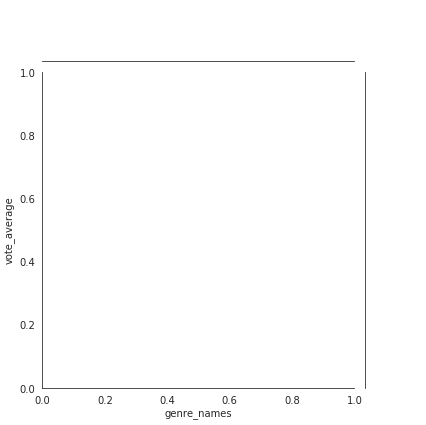

In [123]:
with sns.axes_style('white'):
    sns.jointplot("genre_names", "vote_average", data=df_movies, kind='hex')